In [32]:
from fastai.conv_learner import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from fastai import *

In [33]:
PATH='../../datasets/amazon-satellite/'

In [5]:
! ls {PATH}

train-jpg        train-jpg.tar.7z train_v2.csv     train_v2.csv.zip


In [8]:
ds=pd.read_csv(f'{PATH}train_v2.csv')
ds.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [9]:
val_indexs=get_cv_idxs(len(ds)-1)

In [11]:
arch=resnet18

In [16]:
def get_data(sz):
    tfms=tfms_from_model(arch,sz,aug_tfms=transforms_top_down,max_zoom=1.05)
    data= ImageClassifierData.from_csv(PATH,'train-jpg',f'{PATH}train_v2.csv',suffix='.jpg',val_idxs=
        val_indexs,tfms=tfms)
    return data

In [17]:
data=get_data(256)

In [19]:
x,y=next(iter(data.trn_dl))

In [23]:
y[:5]



Columns 0 to 12 
    1     0     0     0     0     1     0     0     0     0     0     0     1
    0     0     0     0     0     1     0     0     0     0     0     0     1
    0     0     0     0     0     1     0     0     0     0     0     0     1
    1     0     0     0     0     1     0     0     0     1     0     0     1
    1     0     0     0     0     1     0     0     1     0     0     0     1

Columns 13 to 16 
    0     0     0     1
    0     0     0     0
    0     0     0     0
    1     0     0     0
    1     0     0     0
[torch.FloatTensor of size 5x17]

In [26]:
list(zip(data.classes,y[0]))

[('agriculture', 1.0),
 ('artisinal_mine', 0.0),
 ('bare_ground', 0.0),
 ('blooming', 0.0),
 ('blow_down', 0.0),
 ('clear', 1.0),
 ('cloudy', 0.0),
 ('conventional_mine', 0.0),
 ('cultivation', 0.0),
 ('habitation', 0.0),
 ('haze', 0.0),
 ('partly_cloudy', 0.0),
 ('primary', 1.0),
 ('road', 0.0),
 ('selective_logging', 0.0),
 ('slash_burn', 0.0),
 ('water', 1.0)]

In [31]:
learn=ConvLearner.pretrained(arch,data,precompute=True)

In [34]:
import json 
dt= pd.read_json(f'../../datasets/kaggle_data/cusine/train.json')

In [35]:
dt.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [40]:
ing=dt.ingredients.values

(array([ 9774., 20342.,  8654.,   881.,    98.,    16.,     4.,     3.,     0.,     2.]),
 array([ 1. ,  7.4, 13.8, 20.2, 26.6, 33. , 39.4, 45.8, 52.2, 58.6, 65. ]),
 <a list of 10 Patch objects>)

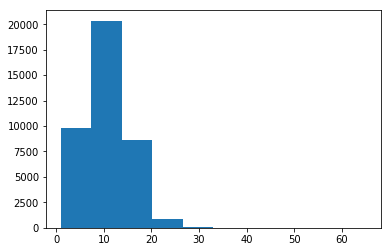

In [44]:
lengs=[]
for ix in ing:
    lengs.append(len(ix))
plt.hist(lengs)